# Fish Dataset EDA

### import library

In [3]:
import plotly
import matplotlib.pyplot as plt
import numpy as np
import PIL
import os.path as osp
import pandas as pd


### 경로 설정

In [4]:
#csv_path
csv_path = '/opt/ml/final-project-level3-cv-13/Data/Fish/Fish_dataset/output/analysis_csv'
train_csv_path = osp.join(csv_path, 'train.csv')
valid_csv_path = osp.join(csv_path, 'valid.csv')

#image_path
image_path = '/opt/ml/final-project-level3-cv-13/Data/Fish/Fish_dataset/output/crop_image'
train_image_path = osp.join(image_path, 'dtset1')
valid_image_path = osp.join(image_path, 'val_images')

#json_path
json_path = '/opt/ml/final-project-level3-cv-13/Data/Fish/Fish_dataset/output/new_json_set'
train_json_path = osp.join(json_path, '[new]_gbt_fish_dtset1.json')
valid_json_path = osp.join(json_path, '[new]_gbt_fish_dtset_val_images.json')

In [4]:

# 카테고리 별 이미지 크기
# 카테고리, 이미지 별 rgb 분포값 (3차원) -> 의미가 있을까?

# validation EDA 입력 -> 결과

### 카테고리 별 개수

In [5]:
train_csv = pd.read_csv(train_csv_path)
valid_csv = pd.read_csv(valid_csv_path)

In [6]:
train_cnt = train_csv['categories_id'].value_counts().sort_index()
print(len(train_csv))

4532


In [7]:
valid_cnt = valid_csv['categories_id'].value_counts().sort_index()

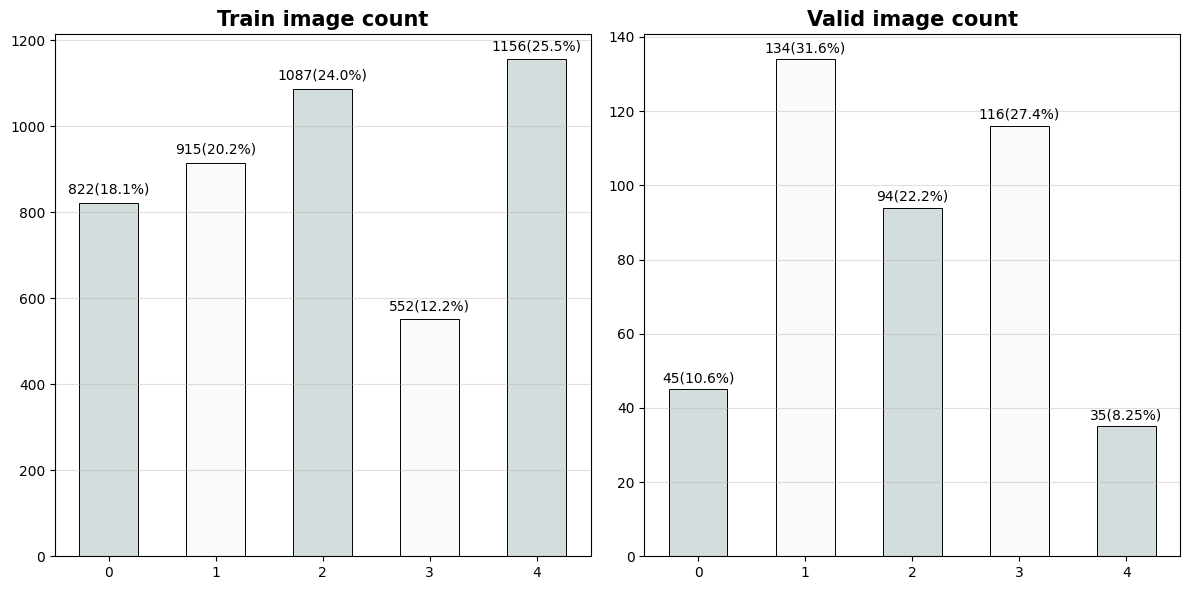

In [8]:
fig = plt.figure(figsize = (12, 6))
gs = fig.add_gridspec(1, 2)

ax = fig.add_subplot(gs[0:1])
ax2 = fig.add_subplot(gs[1:2])

ax.bar(train_cnt.index, train_cnt, color=['#d4dddd' if i%2==0 else '#fafafa' for i in range(9)],
        width=0.55, 
        edgecolor='black', 
        linewidth=0.7)
ax2.bar(valid_cnt.index, valid_cnt, color=['#d4dddd' if i%2==0 else '#fafafa' for i in range(9)],
        width=0.55, 
        edgecolor='black', 
        linewidth=0.7)

for i in range(5):
    ax.annotate(f'{train_cnt[i]}({train_cnt[i]/len(train_csv)*100:.3}%)', xy=(i, train_cnt[i]+30),
                   va='center', ha='center',
               )
    ax2.annotate(f'{valid_cnt[i]}({valid_cnt[i]/len(valid_csv)*100:.3}%)', xy=(i, valid_cnt[i]+3),
                   va='center', ha='center',
               )

ax.set_title('Train image count', weight='bold', fontsize=15)
ax.grid(axis='y', linestyle='-', alpha=0.4)

ax2.set_title('Valid image count', weight='bold', fontsize=15)
ax2.grid(axis='y', linestyle='-', alpha=0.4)



fig.tight_layout()
plt.show()

### 카테고리 별 이미지 크기

In [9]:
train_json = pd.read_json(train_json_path)
train_json = train_json.transpose()
train_json['width'] = 0
train_json['height'] = 0
valid_json = pd.read_json(valid_json_path)
valid_json = valid_json.transpose()
valid_json['width'] = 0
valid_json['height'] = 0

In [17]:
for i in range(len(train_json)):
    train_json['width'][i] = train_json['bbox'][i][2]
    train_json['height'][i] = train_json['bbox'][i][3]
for i in range(len(valid_json)):
    valid_json['width'][i] = valid_json['bbox'][i][2]
    valid_json['height'][i] = valid_json['bbox'][i][3]
    

/tmp/ipykernel_12572/3000901134.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_json['width'][i] = train_json['bbox'][i][2]
/tmp/ipykernel_12572/3000901134.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_json['height'][i] = train_json['bbox'][i][3]
/tmp/ipykernel_12572/3000901134.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_json['width'][i] = valid_json['bbox'][i][2]
/tmp/ipykernel_12572/3000901134.py:6

In [16]:
train_json['width']['height']

,img_file_name,categories_id,bbox,width,height
0,496751_objt_kr_2021-01-27_19-45-25-66_003.JPG,2.0,"[865.0, 587.0, 1419.0, 593.0]",1419.0,593.0
1,404010_objt_kr_2021-01-26_09-08-07-66_003.JPG,2.0,"[792.0, 720.0, 1376.0, 440.0]",1376.0,440.0
2,370367_objt_of_2021-01-08_10-27-21-66_003.JPG,1.0,"[464.0, 221.0, 613.0, 776.0]",613.0,776.0
3,601534_objt_of_2021-02-04_12-01-22-33_002.JPG,1.0,"[276.0, 60.0, 572.0, 1047.0]",572.0,1047.0
4,514196_objt_kr_2021-01-27_09-46-44-00_001.JPG,2.0,"[69.0, 494.0, 1625.0, 518.0]",1625.0,518.0
...,...,...,...,...,...
419,116458_objt_rs_2020-12-15_11-54-10-33_002.JPG,3.0,"[1081.0, 651.0, 1230.0, 487.0]",1230.0,487.0
420,326964_objt_bp_2021-01-20_11-41-20-00_001.JPG,4.0,"[392.0, 625.0, 1529.0, 621.0]",1529.0,621.0
421,603976_objt_kr_2021-02-05_16-48-42-66_003.JPG,2.0,"[1210.0, 694.0, 633.0, 239.0]",633.0,239.0
422,240730_objt_rs_2021-01-08_16-04-31-00_001.jpg,3.0,"[214.0, 845.0, 1012.0, 413.0]",1012.0,413.0


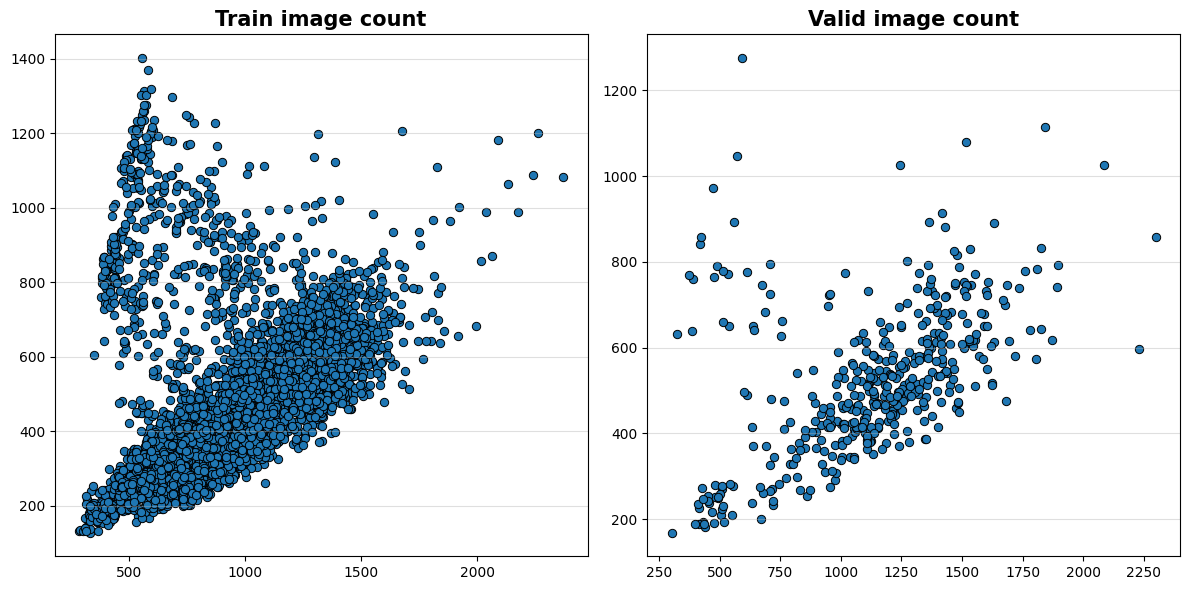

In [20]:
fig = plt.figure(figsize = (12, 6))
gs = fig.add_gridspec(1, 2)

ax = fig.add_subplot(gs[0:1])
ax2 = fig.add_subplot(gs[1:2])

ax.scatter(train_json['width'], train_json['height'],
        edgecolor='black', 
        linewidth=0.7)
ax2.scatter(valid_json['width'], valid_json['height'],
        edgecolor='black', 
        linewidth=0.7)


colors = {'1.0':'red', 'Korea rockfish':'green', 'Asia':'blue', 'Australia':'yellow'}
ax.set_title('Train image count', weight='bold', fontsize=15)
ax.grid(axis='y', linestyle='-', alpha=0.4)

ax2.set_title('Valid image count', weight='bold', fontsize=15)
ax2.grid(axis='y', linestyle='-', alpha=0.4)



fig.tight_layout()
plt.show()